# Autocorrelation
I am trying to replicate a few examples to learn and practice autocorrelation. This kind of correlation relates a variable to itself with a certain time lag. If a variable is high in autocorrelation, it depends highly on itself from some kind of time period ahead.
Temperatures or stock prices can be considered as examples, where such an autocorrelation must exist.
The following takes some inspiration on the code from https://www.geeksforgeeks.org/how-to-calculate-autocorrelation-in-python/

In [18]:
# import modules
import pandas as pd
# In order to use the autocorrelation function below
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
# read the data from the csv
data = pd.read_csv("daily-minimum-temperatures-in-blr.csv",
				header=0, index_col=0, parse_dates=True)
data = data.squeeze('columns') # to reduce complexity

In [3]:
# Checking out the data in the set
data.head()

Date
1981-01-01    32.7
1981-01-02    29.9
1981-01-03    30.8
1981-01-04    26.6
1981-01-05    27.8
Name: Daily minimum temperatures in Bangalore, India, 1981-1990, dtype: float64

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

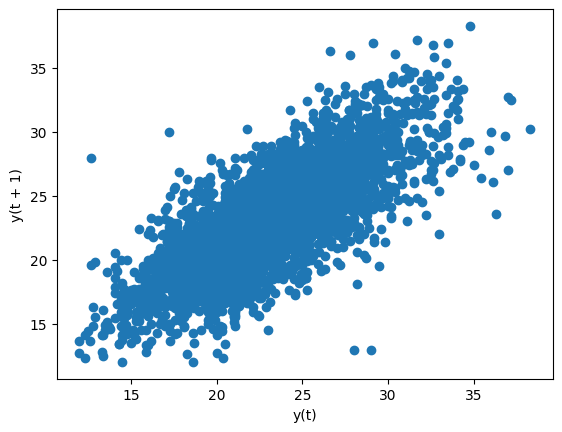

In [4]:
# lagplot with one time period delayed
pd.plotting.lag_plot(data, lag=1)

As can be seen in this graph, there is a correlation between the day before and the day thereafter. The point cloud leads to somewhat of a good correlation. Let's calculate the values of that correlation!
In order to achieve this, we take the values for the timepoint t and then create a dataframe, where we just shift the values by one, two, and three days. Eventually, we calculate the Pearson correlation coefficient of those shifted days to one another

In [5]:
# extracting only the temperature values
values = pd.DataFrame(data.values)

In [6]:
# using shift function to shift the values
shifted = pd.concat([values.shift(4), values.shift(3), values.shift(2),
					values.shift(1), values], axis=1)
# naming the columns
shifted.columns = ['t', 't+1', 't+2', 't+3', 't+4']

In [7]:
# using corr() function to compute the correlation
result = shifted.corr(method = 'pearson')
print(result)

            t       t+1       t+2       t+3       t+4
t    1.000000  0.766787  0.623038  0.579395  0.574184
t+1  0.766787  1.000000  0.766809  0.623083  0.579424
t+2  0.623038  0.766809  1.000000  0.766818  0.623108
t+3  0.579395  0.623083  0.766818  1.000000  0.766803
t+4  0.574184  0.579424  0.623108  0.766803  1.000000


The correlation coefficient of one lag time period is nicely high and almost the same in all three observations with 0.766809, 0.76618, and 0.766803 respectively. Eventually a decrease to 0.623 and 0.579 with two and three lag periods can be observed.
Adding a fourth day continues the above observations in the same vein.

### AutoCorrelation Function
This function checks for what time lag there is the biggest correlation. It helps to understand for further modeling what kind of dependancy is likely. 
This function allows a quick plot of the autoccorelation with all kinds of parameters. In this case we choose alpha = 0.05 for a 95% confidence.

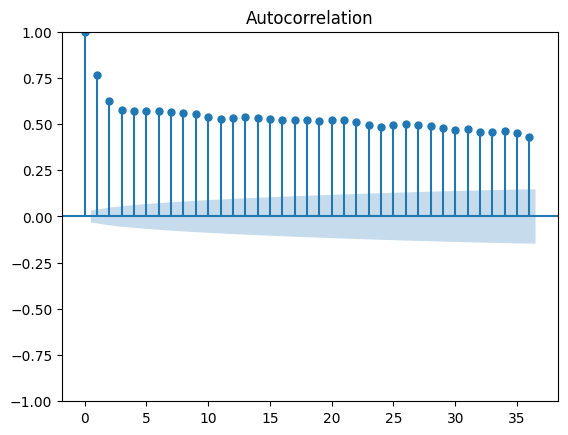

In [8]:
# plot the auto correlation with alpha = 0.05
plot_acf(data, alpha=0.05);

It is evident to see that the observation from above continues to be seen. The further we move away from the day, the lesser the dependancy becomes. However, it is interesting to see that even after 35 days, the correlation coefficient is still somewhat around 0.5

## Lufthansa Case
Let's have a look at the Lufthansa stock development. Data can be found on yahoo. It is data that goes from December 16th, 1996 until March 22, 2024.
Checking out whether the techniques from above will hold as well.

In [9]:
# read the data from the csv
lufthansa = pd.read_csv("lufthansa_stock_history.csv",
				header=0, index_col=0, parse_dates=True)

In [10]:
lufthansa.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-12-16,7.597196,7.688404,7.392869,7.462167,4.281902,1066584
1996-12-17,7.425698,7.622745,7.370959,7.615466,4.369868,1052852
1996-12-18,7.626385,7.805162,7.527897,7.564366,4.340545,1332249
1996-12-19,7.535177,7.692044,7.535177,7.648295,4.388705,594524
1996-12-20,7.644655,7.735864,7.480438,7.516907,4.313313,763507


In [11]:
lufthansa_close = lufthansa[['Close']].copy()

In [12]:
lha = lufthansa_close.squeeze('columns') # to reduce complexity

In [13]:
lha.head()

Date
1996-12-16    7.462167
1996-12-17    7.615466
1996-12-18    7.564366
1996-12-19    7.648295
1996-12-20    7.516907
Name: Close, dtype: float64

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

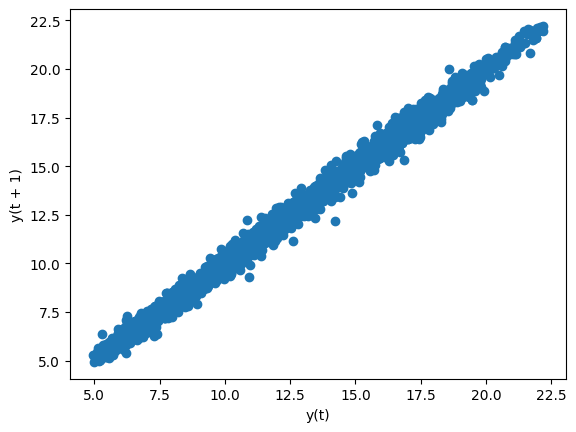

In [14]:
pd.plotting.lag_plot(lha, lag=1)

It can be seen that with a lag of one period the correlation is even closer to what has been observed in regards to the temperatures

In [15]:
values_lha = pd.DataFrame(lha.values)
# using shift function to shift the values
shifted_lha = pd.concat([values_lha.shift(4), values_lha.shift(3), values_lha.shift(2),
					values_lha.shift(1), values_lha], axis=1)
# naming the columns
shifted_lha.columns = ['t', 't+1', 't+2', 't+3', 't+4']
# using corr() function to compute the correlation
result_lha = shifted_lha.corr(method = 'pearson')
print(result_lha)

            t       t+1       t+2       t+3       t+4
t    1.000000  0.997695  0.995325  0.992993  0.990689
t+1  0.997695  1.000000  0.997695  0.995326  0.992994
t+2  0.995325  0.997695  1.000000  0.997695  0.995326
t+3  0.992993  0.995326  0.997695  1.000000  0.997696
t+4  0.990689  0.992994  0.995326  0.997696  1.000000


This is almost close to 1, even for fourt days lagging!

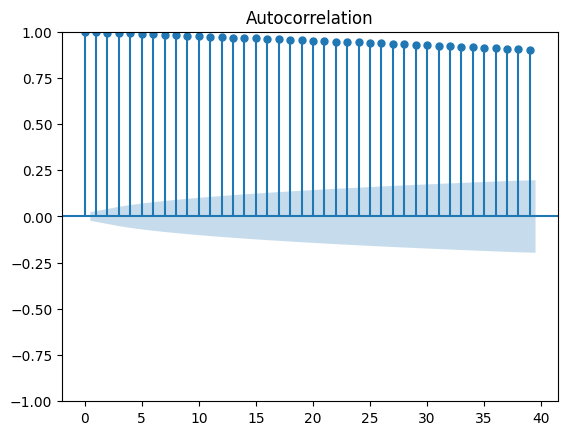

In [16]:
# plot the auto correlation with alpha = 0.05
plot_acf(lha, alpha=0.05);

As before the effect reduces over the reduced lagging time, however, it can be said that the Lufthansa closing stock price is heavily autocorrelated over the span of almost 30 years.

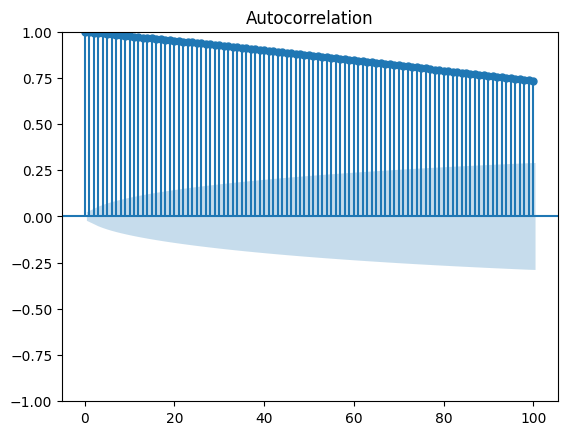

In [17]:
# plot the auto correlation with alpha = 0.05
plot_acf(lha, alpha=0.05, lags=100);

Even if the lagging is extended to 100 days, the correlation is still significant. The reduction of the autocorrelation has a negative linear slope. 